## Observations and Insights 

In [1]:
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import scipy.stats as st
import numpy as np
import functools as ft


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata.head()
# study_results.head()

# Combine the data into a single dataset 
combined_df = pd.merge(mouse_metadata, study_results, how = "outer")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouseID = (len(combined_df["Mouse ID"].unique()))
print(f"# of mice in raw data: {mouseID}")

# of mice in raw data: 249


In [4]:
#checks which mice have duplicates in Mouse ID and Timepoint
duplicates = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
# duplicates

# df containing only g989 (Mouse ID with duplicates) data 
g989_data = combined_df.loc[combined_df["Mouse ID"]=="g989"]
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#This one drops the second duplicate but keeps the rest of the mouse data
cleaned_df_with989 = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
#cleaned_data_with989

#Return df excluding Mouse ID g989 
cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame
clean_mice = len(cleaned_df["Mouse ID"].unique())
print(f"# of mice in clean df: {clean_mice}")

# of mice in clean df: 248


## Summary Statistics

In [7]:
cleaned_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_df = (cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]).groupby(["Drug Regimen"]).mean()
mean_df = mean_df.rename(columns={"Tumor Volume (mm3)":"Mean Volume"})

median_df = (cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]).groupby(["Drug Regimen"]).median()
median_df = median_df.rename(columns={"Tumor Volume (mm3)":"Median Volume"})

variance_df = (cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]).groupby(["Drug Regimen"]).var()
variance_df = variance_df.rename(columns={"Tumor Volume (mm3)":"Variance"})

std_df = (cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]).groupby(["Drug Regimen"]).std()
std_df = std_df.rename(columns={"Tumor Volume (mm3)":"STDev"})

sem_df = (cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]).groupby(["Drug Regimen"]).sem()
sem_df = sem_df.rename(columns={"Tumor Volume (mm3)":"SEM"})

#make a list of dataframes and use reduce() to merge the 5 dfs into one summary_df
dfs = [mean_df, median_df, variance_df, std_df, sem_df]
summary_df = ft.reduce(lambda left, right: pd.merge(left, right, on='Drug Regimen'),dfs)
summary_df

,Mean Volume,Median Volume,Variance,STDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

df = cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]

agg_funcs = ['mean', 'median', 'std', 'var', 'sem']
summary_df2 = df.groupby(['Drug Regimen']).agg(agg_funcs)
summary_df2.head()


Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466

## Bar and Pie Charts

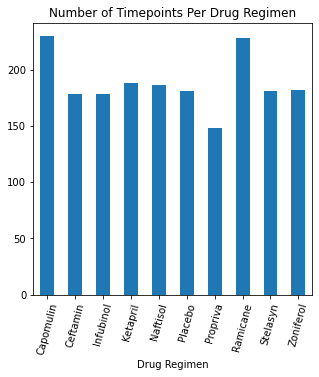

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#create a df with sum of timepoints grouped by drug regimen
drug_time = cleaned_df[["Drug Regimen", "Timepoint"]]
time_sum = pd.DataFrame(drug_time.groupby(["Drug Regimen"]).agg(['count']))

time_sum_plot = time_sum[["Timepoint"]].plot(kind='bar', title="Number of Timepoints Per Drug Regimen", figsize=(5,5), legend=False, rot = 75)
    

In [11]:
time_sum = time_sum.reset_index()
#time_sum
time_sum.columns.tolist()

[('Drug Regimen', ''), ('Timepoint', 'count')]

([<matplotlib.axis.XTick at 0x2627a3e1ac0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

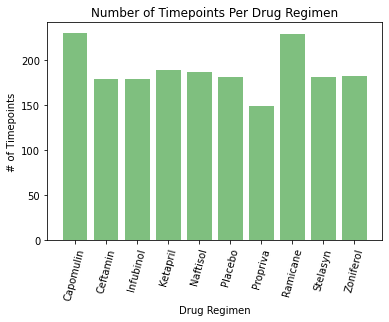

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

xtick = np.arange(len(time_sum[['Drug Regimen']]))

plt.bar(xtick, time_sum['Timepoint'].squeeze(), color = "green", alpha=0.50)

plt.title('Number of Timepoints Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')

plt.xticks(xtick, time_sum['Drug Regimen'], rotation=75)

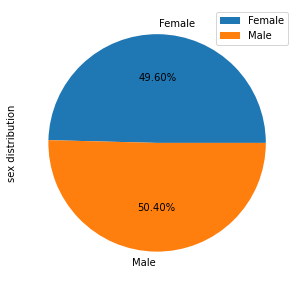

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#find multiple instances of Mouse ID and create a df with only the unique values and their sex
#cleaned_df['Sex'].describe()

id_sex = cleaned_df[['Mouse ID', "Sex"]].drop_duplicates(subset=['Mouse ID', 'Sex'], keep='first').rename(columns={"Mouse ID": "sex distribution"})


#count unique values of MouseID 
mf_df = id_sex.groupby(['Sex']).count()
#mf_df


plot = mf_df.plot.pie(y='sex distribution', figsize=(5, 5),  autopct='%1.2f%%')


Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

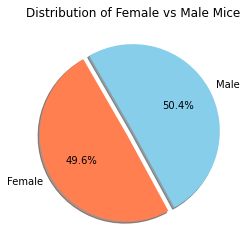

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
mf_count = mf_df["sex distribution"].tolist()
colors = ["coral", "skyblue"]
explode = (0.08, 0)

plt.pie(mf_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Distribution of Female vs Male Mice")


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Grab the last (greatest) timepoint for each mouse
tp_df = pd.DataFrame(cleaned_df.groupby('Mouse ID').Timepoint.max()).reset_index()
# tp_df.head()
# print(len(tp_df))

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tp = pd.merge(tp_df, cleaned_df, on=["Mouse ID", "Timepoint"]).rename(columns={"Timepoint":"Last Timepoint", "Tumor Volume (mm3)":"Tumor Volume"})
last_tp

,Mouse ID,Last Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
last_tp['Drug Regimen'].unique()

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [17]:
def get_bounds(df):
    """ gets low and upper bounds
    
    Parameters:
        df(pd.DataFrame): a 1D dataframe
        
    Returns:
        (float,float): a tuple of the lower and upper bounds 
    
    """
    quartiles = df.quantile([0.25,0.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    iqr = upperq - lowerq
    
    lowbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)

    return lowbound, upperbound

def get_outliers(df,lb,ub):
    """ 
    
    Parameters:
        df(pd.DataFrame): dataframe
        lb(float): lower bound for volume values
        ub(float): upper bound for volume values
        
    Returns:
        outliers(float): outliers
    """
    outliers = []
    for v in df:
        if v < lb or v > ub:
            outliers.append(v)
    
    return outliers




# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
vols_dict = {}
ids_dict = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for reg, vol, id in zip(last_tp['Drug Regimen'], last_tp['Tumor Volume'], last_tp['Mouse ID']):
    
    drug = str(reg)
    
    if drug not in vols_dict.keys():
        vols_dict[drug] = [vol] 
        ids_dict[drug] = [id]
    else:
        vols_dict[drug].append(vol)
        ids_dict[drug].append(id)
    
# treatment_vols_list = [vols_dict[t] for t in treatments]

treatment_vols_list = []
print(f"{'Regimen':15s} | [{'lb':8s}  {'ub':8s}] | {'n_out':6s}")
for t in treatments:
    vols_df = pd.DataFrame(vols_dict[t])
    vols = vols_df[0]
    
    # lb and ub
    lb, ub = get_bounds(vols)
    
    # n_ol
    out = len(get_outliers(vols, lb, ub))
    
    treatment_vols_list.append(vols)
    print(f"{t:15s} | [{lb:8.3f}, {ub:8.3f}] | {out:6d}")

Regimen         | [lb        ub      ] | n_out 
Capomulin       | [  20.705,   51.832] |      0
Ramicane        | [  17.913,   54.307] |      0
Infubinol       | [  36.833,   82.741] |      1
Ceftamin        | [  25.355,   87.666] |      0


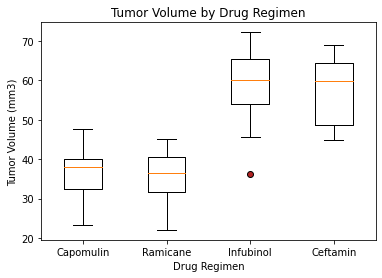

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
flierprops = dict(marker='o', markerfacecolor='firebrick')
ax1.boxplot(treatment_vols_list, labels=treatments, flierprops=flierprops)
plt.show()


## Line and Scatter Plots

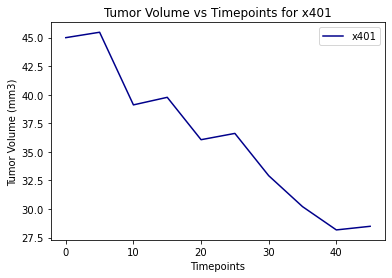

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# capomulin_df = cleaned_df.loc[(cleaned_df['Drug Regimen']=="Capomulin") & (cleaned_df['Mouse ID']=="x401")]
capomulin_df = cleaned_df.loc[(cleaned_df['Drug Regimen']=="Capomulin")].reset_index(drop=True)
x401_df = capomulin_df.loc[capomulin_df['Mouse ID']=="x401"]
# print((capomulin_df["Mouse ID"].unique()))
x401_vol = x401_df["Tumor Volume (mm3)"].values.tolist()
x401_tp = x401_df["Timepoint"].values.tolist()
# s710_tp


fig2, ax2 = plt.subplots()
ax2.set_xlabel("Timepoints")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.set_title("Tumor Volume vs Timepoints for x401")
ax2.plot(x401_tp,x401_vol, label='x401', color="darkblue")
ax2.legend()




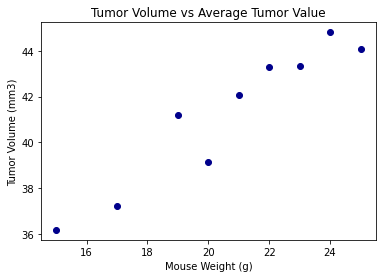

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# capomulin_df
weight_avgvol = capomulin_df[["Weight (g)", "Tumor Volume (mm3)"]].groupby(capomulin_df["Weight (g)"]).mean()
weight_avgvol
# grouped_id.head()
x_values = weight_avgvol["Weight (g)"]
y_values = weight_avgvol["Tumor Volume (mm3)"]

fig3, ax3 = plt.subplots()
ax3.set_xlabel("Mouse Weight (g)")
ax3.set_ylabel("Tumor Volume (mm3)")
ax3.set_title("Tumor Volume vs Average Tumor Value")
plt.scatter(x_values, y_values, color="darkblue")
plt.show()



## Correlation and Regression

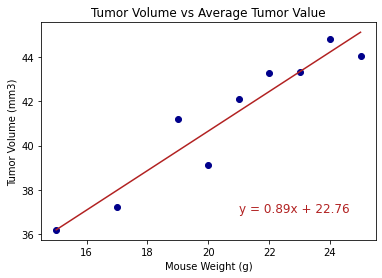

The r^2 value is 0.903
The correlation between mouse weight and average tumor volume is 0.95


In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(x_values,y_values)[0],2)


(m, b, rval, pval, std) = st.linregress(x_values, y_values)
linregress_values = m * x_values + b
lineq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))

fig3, ax3 = plt.subplots()
ax3.set_xlabel("Mouse Weight (g)")
ax3.set_ylabel("Tumor Volume (mm3)")
ax3.set_title("Average Tumor Volume vs Weight")
plt.scatter(x_values, y_values, color="darkblue")
plt.plot(x_values, linregress_values, color = "firebrick")
plt.annotate(lineq, (21,37), fontsize=12, color="firebrick")
plt.show()

print(f"The r^2 value is {rval**2:4.3f}")
print(f"The correlation between mouse weight and average tumor volume is {corr}")